In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import sys 
sys.path.append(r'\\allen\programs\celltypes\workgroups\mousecelltypes\SarahWB\datasets\human_exc\code\templates') 
from template_utils_v2 import plot_prop_for_mets_swb

sys.path.append(r'\\allen\programs\celltypes\workgroups\mousecelltypes\SarahWB\datasets\human_exc\code\utils') 
from utils import get_seaad_colors

SEAAD_COLORS = get_seaad_colors()

Select taxonomy level (supertype, subclass)

In [2]:
# tx_label = 'SEAAD_Subclass_name'
# tx_level = 'subclass'

tx_label = 'SEAAD_Supertype_name'
tx_level = 'ttype'

Load data

In [3]:
#load isodepths from Emily 
isodepth_file = r'\\allen\programs\celltypes\workgroups\mousecelltypes\SarahWB\datasets\human_exc\data\isodepth\20250624\20250624_isodepths.csv'
isodepth_df = pd.read_csv(isodepth_file)

#get human glut supertypes
tx_file = r'\\allen\programs\celltypes\workgroups\mousecelltypes\SarahWB\datasets\human_exc\data\formatting_dicts\{}_order.txt'.format(tx_level)
with open(tx_file, 'r') as f:
    tx_list = f.read().splitlines()

#get human glut isodepths
glut_isodepth_df = isodepth_df[isodepth_df[tx_label].isin(tx_list)].copy()
glut_isodepth_df[tx_label] = pd.Categorical(glut_isodepth_df[tx_label], categories=tx_list, ordered=True)
glut_isodepth_df = glut_isodepth_df.sort_values(tx_label)

print(len(isodepth_df))
print(len(glut_isodepth_df))


21646
8607


In [4]:
peak_isodepth_df_histo = pd.read_csv(r'\\allen\programs\celltypes\workgroups\mousecelltypes\SarahWB\datasets\human_exc\data\isodepth\20250624\isodepth_{}_ordering_histo.csv'.format(tx_level))
peak_isodepth_df_mean = pd.read_csv(r'\\allen\programs\celltypes\workgroups\mousecelltypes\SarahWB\datasets\human_exc\data\isodepth\20250624\isodepth_{}_ordering_mean.csv'.format(tx_level))
peak_isodepth_df_kde = pd.read_csv(r'\\allen\programs\celltypes\workgroups\mousecelltypes\SarahWB\datasets\human_exc\data\isodepth\20250624\isodepth_{}_ordering_kde.csv'.format(tx_level))

isodepth_order_histo = peak_isodepth_df_histo[tx_label].tolist()
isodepth_order_mean = peak_isodepth_df_mean[tx_label].tolist()
isodepth_order_kde = peak_isodepth_df_kde[tx_label].tolist()

tx_order_dict = {
    'histogram' : [isodepth_order_histo, peak_isodepth_df_histo],
    'mean' : [isodepth_order_mean, peak_isodepth_df_mean],
    'kde' : [isodepth_order_kde, peak_isodepth_df_kde]
}

Plot

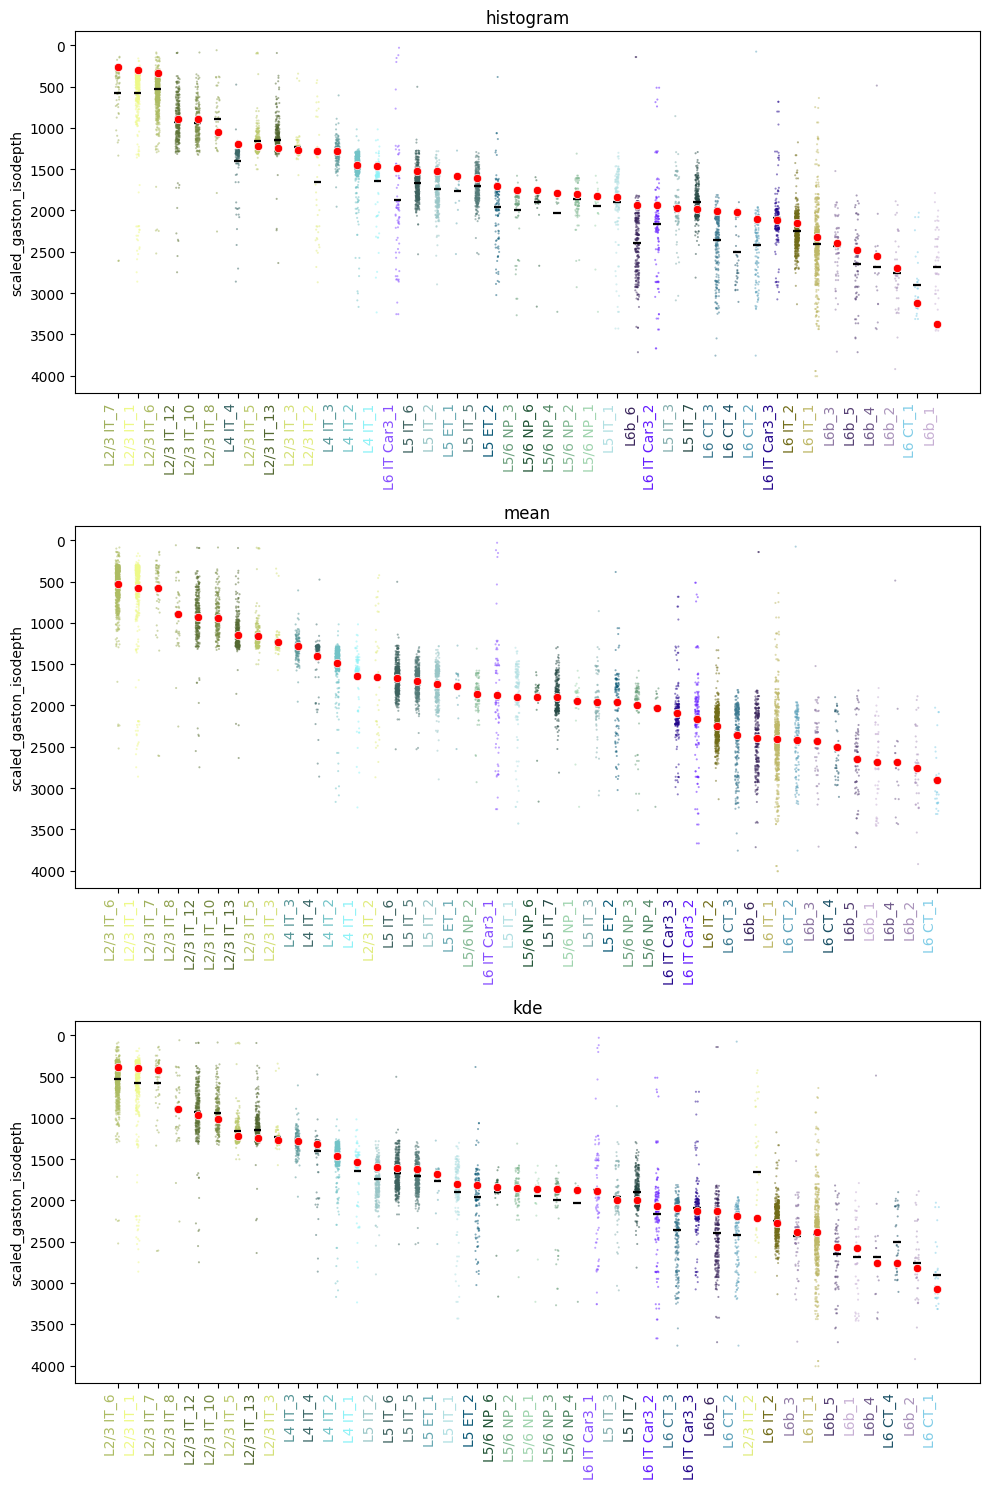

In [5]:
merge_df = glut_isodepth_df
type_column = tx_label
prop_name = 'scaled_gaston_isodepth'

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))  # Swap width and height for horizontal


for i, (order_name, [tx_order, tx_df]) in enumerate(tx_order_dict.items()):
    
    ax = axes[i]


    sns.stripplot(
        data=merge_df.loc[merge_df[type_column].isin(tx_order), :],
        x=type_column,               # Categories on x-axis
        y=prop_name,                 # Values on y-axis
        hue=type_column,
        palette=SEAAD_COLORS,
        s=1.5,
        alpha=0.5,
        order=tx_order,           # order applies to x-axis now
        ax=ax,
        zorder=-5
    )


    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        sns.pointplot(
            data=merge_df.loc[merge_df[type_column].isin(tx_order), :],
            x=type_column,
            y=prop_name,
            color='black',         
            markers="_",
            scale=0.8,
            errorbar=None,
            order=tx_order,
            linestyles="None",   # <-- disables connecting lines
            ax=ax
        )

        #plot the isodepth used to order
        sns.scatterplot(tx_df, x=type_column, y='scaled_gaston_isodepth', ax=ax, color='red')

        ax.legend_.remove()

    ax.invert_yaxis()

    # Remove x-axis label
    ax.set_xlabel('')

    # Rotate x-axis tick labels 90 degrees and color them
    xticks = ax.get_xticklabels()
    for label in xticks:
        label.set_rotation(90)
        label.set_ha('right')
        # Set color based on the label text using SEAAD_COLORS dict
        label_text = label.get_text()
        if label_text in SEAAD_COLORS:
            label.set_color(SEAAD_COLORS[label_text])
        else:
            label.set_color('black')  # fallback color

    ax.set_xticklabels(xticks)  # update the labels with new properties

    ax.set_title(order_name)

plt.tight_layout()
plt.show()
